In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [2]:
df = pd.read_csv('dataclean.csv')
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,13.0,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [3]:
df['price_ratio'] = df['normalized_new_price'] - df['normalized_used_price']

In [4]:
df['normalized_used_price'] = df['normalized_used_price'].apply(lambda x: round(x, 1))
df['normalized_new_price'] = df['normalized_new_price'].apply(lambda x: round(x, 1))
df['price_ratio'] = df['price_ratio'].apply(lambda x: round(x, 1))

In [5]:
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,price_ratio
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.3,4.7,0.4
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.2,5.5,0.4
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.1,5.9,0.8
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.1,5.6,0.5
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.4,4.9,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,13.0,8.0,64.0,6.0,5000.0,190.0,2019,232,4.5,6.5,2.0
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.0,6.3,1.2
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.4,4.5,0.2
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.3,4.6,0.3


In [6]:
brand_avg_ratio = df.groupby('device_brand')['price_ratio'].mean()

In [7]:
top_10_data = df.nlargest(10, 'price_ratio')

In [8]:
selected_columns = ['device_brand', 'normalized_new_price', 'normalized_used_price', 'price_ratio']

In [9]:
display(top_10_data[selected_columns])

,device_brand,normalized_new_price,normalized_used_price,price_ratio
650,Apple,6.9,4.5,2.4
1300,Huawei,7.1,4.7,2.4
2241,Panasonic,6.7,4.3,2.4
369,Samsung,6.9,4.6,2.3
1081,Google,6.7,4.5,2.3
2246,Panasonic,6.1,3.8,2.3
2349,Others,6.6,4.3,2.3
2528,Samsung,6.1,3.8,2.3
701,Asus,6.9,4.6,2.2
323,Micromax,3.7,1.6,2.1


In [10]:
top_brands = brand_avg_ratio.sort_values(ascending=False).head(10)
top_brands

device_brand
Apple         1.335897
Google        1.193333
OnePlus       1.118182
HTC           1.039091
Samsung       1.016716
Sony          1.015116
Gionee        1.001786
LG            0.994030
BlackBerry    0.990909
Oppo          0.927132
Name: price_ratio, dtype: float64

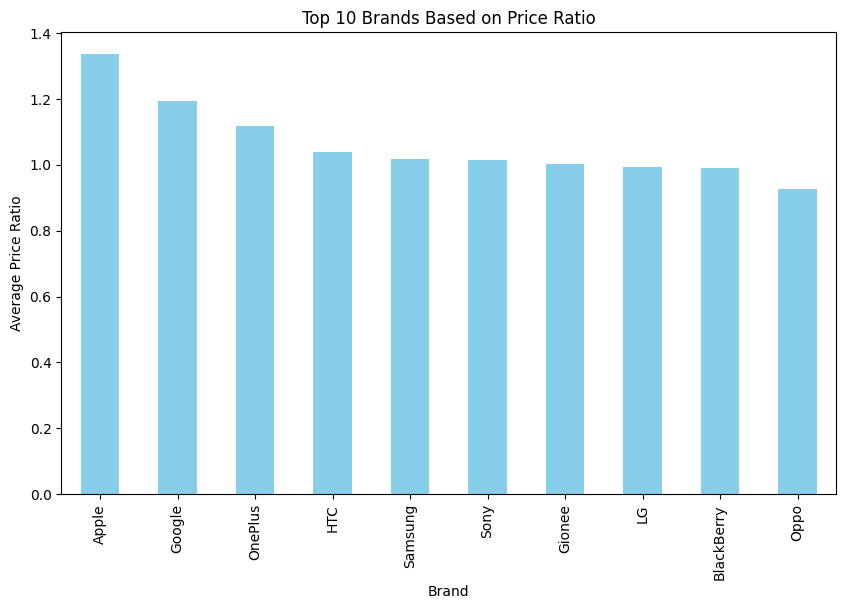

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
top_brands.plot(kind='bar', color='skyblue')
plt.title('Top 10 Brands Based on Price Ratio')
plt.xlabel('Brand')
plt.ylabel('Average Price Ratio')
plt.show()

In [12]:
df.to_csv("top_10_phone&tablet_price_ratio.csv", index=False)

In [13]:
df_data = df.iloc[: , 13:16]
df_target = df.iloc[: , 0]
df_data,df_target

(      normalized_used_price  normalized_new_price  price_ratio
 0                       4.3                   4.7          0.4
 1                       5.2                   5.5          0.4
 2                       5.1                   5.9          0.8
 3                       5.1                   5.6          0.5
 4                       4.4                   4.9          0.6
 ...                     ...                   ...          ...
 3449                    4.5                   6.5          2.0
 3450                    5.0                   6.3          1.2
 3451                    4.4                   4.5          0.2
 3452                    4.3                   4.6          0.3
 3453                    4.1                   4.3          0.1
 
 [3454 rows x 3 columns],
 0         Honor
 1         Honor
 2         Honor
 3         Honor
 4         Honor
          ...   
 3449       Asus
 3450       Asus
 3451    Alcatel
 3452    Alcatel
 3453    Alcatel
 Name: device_bra

In [14]:
#membagi dataset menjadi data training dan data testing
atr_train, atr_test, kelas_train, kelas_test = train_test_split(df_data, df_target, test_size=0.2, random_state=0)

In [15]:
atr_train.shape, atr_test.shape

((2763, 3), (691, 3))

In [16]:
kelas_train.shape,kelas_test.shape

((2763,), (691,))

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [18]:
#menjalankan metode ensemble bagging
modelknn = KNeighborsClassifier(n_neighbors=5)
modelensemble=BaggingClassifier(base_estimator=modelknn, n_estimators=15, max_samples=0.7)

In [19]:
#melakukan pengujian dengan cross validation
akurasi = cross_val_score(modelensemble, df_data, df_target, cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

In [20]:
#melihat rata-rata akurasi metode ensemble bagging
print(akurasi.mean())

0.10942112758649578


In [21]:
from sklearn.ensemble import AdaBoostClassifier

In [22]:
#menjalankan  metode ensemble boosting
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()
modelensemble2 = AdaBoostClassifier(base_estimator=modelNB, n_estimators=30)

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
#melakukan pengujian dengan cross validation
akurasi2 = cross_val_score(modelensemble2, df_data, df_target, cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

In [25]:
#melihat rata-rata akurasi dari metode ensemble boosting
print(akurasi2.mean())

0.06281896623942364


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Membuat dataset contoh
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)

# Membuat model Logistic Regression
model_lr = LogisticRegression(random_state=42)

# Membuat ensemble model menggunakan VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('decision_tree', model_dt),
    ('logistic_regression', model_lr)
], voting='hard')  # 'hard' untuk majority voting

# Melatih ensemble model pada data latih
ensemble_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = ensemble_model.predict(X_test)

# Evaluasi performa ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.85
